# Application de santé publique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
raw_data = pd.read_csv(r'C:\Users\Gregoire\Desktop\Projet 3 - Application de santé publique\Data\fr.openfoodfacts.org.products.csv', sep = '\t', low_memory=False)

## Profil du jeu de données

In [3]:
raw_data.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000016117,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000016124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
8,0000000016193,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000016513,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_data.shape

(320772, 162)

In [5]:
raw_data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [6]:
# Visualisation rapide des NaN
#%matplotlib inline
#msno.matrix(raw_data)

On remarque que quelques variables semblent entièrement vides! En atteste ces zones blanches dans les colonnes du milieu et de la fin du dataset.

En outre, il y a une très nette différence entre la moitié haute et la moitié basse du dataset. Mon intuition est qu'il y a eu une évolution dans le codage des entrées à partir d'une certaine date. On va donc les classer par date de création (created_t) afin de tester cette hypothèse.

In [7]:
# Classement des données par date
raw_data.sort_values(by='created_t')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
187478,3017760038409,http://world-fr.openfoodfacts.org/produit/3017...,marianne,0,NaN,1488992055,2017-03-08T16:54:15Z,Lulu la barquette (Fraise),Génoise garnie à la purée de fraise,120 g,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN
251761,3760029248001,http://world-fr.openfoodfacts.org/produit/3760...,stephane,1328021038,2012-01-31T14:43:58Z,1482511099,2016-12-23T16:38:19Z,Caramels tendres au beurre salé au sel de Guér...,Caramels au beurre salé et à la fleur de sel d...,100 g,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,28.0,NaN,NaN
188901,3029330062806,http://world-fr.openfoodfacts.org/produit/3029...,stephane,1328783696,2012-02-09T10:34:56Z,1482511099,2016-12-23T16:38:19Z,Jacquet Les bouchées créatives à garnir,Supports en pâte cuite prêts à garnir,54 g,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN
212131,3257980112590,http://world-fr.openfoodfacts.org/produit/3257...,marianne,1328971867,2012-02-11T14:51:07Z,1459016622,2016-03-26T18:23:42Z,Boudoirs,30 Boudoirs aux œufs frais,175 g,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN
195704,3160181210524,http://world-fr.openfoodfacts.org/produit/3160...,stephane,1328986318,2012-02-11T18:51:58Z,1403887806,2014-06-27T16:50:06Z,Cookies tout chocolat Biocoop,Cookies au chocolat,200 g,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189262,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Banque alimentaire,France,en:france,France,"_Lait_ écrémé, cerise (8,0 %), _lait_ écrémé c...","Lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, rhubarbe (8 %), sucre (8 %), la...","Lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème, lactiques",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189248,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,lAllFElt...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#%matplotlib inline
#msno.matrix(raw_data)

En effet, si l'on classe le dataset par date, ce changement dans le nombre et le positionnement moyen de NaN est toujours aussi marqué. Nous allons par exemple inspecter les colonnes 8, 9, 10, 11 (qui correspondent aux premières colonnes du dataset où ce changement est visible), mais aussi d'autres, afin d'en apprendre davatange sur la nature de ce changement observé.

In [9]:
# Nous allons finalement regarder bien davantage de colonnes qui semblent présenter ce changement
raw_data.iloc[:,[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,34,35,36]]

,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,...,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,ingredients_text,allergens,allergens_fr
0,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN
2,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN
3,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN
4,NaN,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organic polenta,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,1,Plastique,plastique,Panzani,panzani,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,NaN,NaN,Plastique,plastique,Trader Joe's,trader-joe-s,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Organic peppermint, organic lemon grass, organ...",NaN,NaN
320769,Leba pickle flavor potato chips,50 g,Plastique,plastique,乐吧,乐吧,Potato chips,"en:salty-snacks,en:appetizers,en:chips-and-fri...","Snacks salés,Apéritif,Chips et frites,Chips,Ch...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,67g,NaN,NaN,Knorr,knorr,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mon hypothèse n'est pas vérifiée, il ne s'agit pas d'un changement de codage (en tous cas pour les colonnes que l'on a regardé) mais d'un ajout d'information qui n'était pas présent auparavant comme par exemple le poids (ou la quantité) du produit, le materiaux d'emballage, ou encore la liste des allergènes.

Par ailleurs, nous pouvons observer que certaines colonnes (souvent juxtaposées) présentent l'exact même profil de NaN. Les colonnes 10 et 11, les colonnes 12 et 13, ainsi que les colonnes 14, 15 et 16 en sont un bon exemple. 10 et 11 sont "packaging" et "packaging_tags", 12 et 13 "brands" et "brands_tags", et 14,15,16 sont "categories", "categories_tags" et "categories_fr".

## Premiers filtrages

La première chose va être de supprimer les colonnes présentant un nombre de NaN supérieur à 90%. 

In [10]:
# Taux de NaN supérieur à 90%?
NaN_under_ninety = raw_data.isnull().sum() < (raw_data.count()*0.9)

In [11]:
nan_filtered_data = raw_data.loc[:, NaN_under_ninety]
nan_filtered_data.shape

(320772, 34)

Nous venons de retirer pas moins de 94 colonnes qui contenaient plus de 90% de valeurs manquantes

<AxesSubplot:>

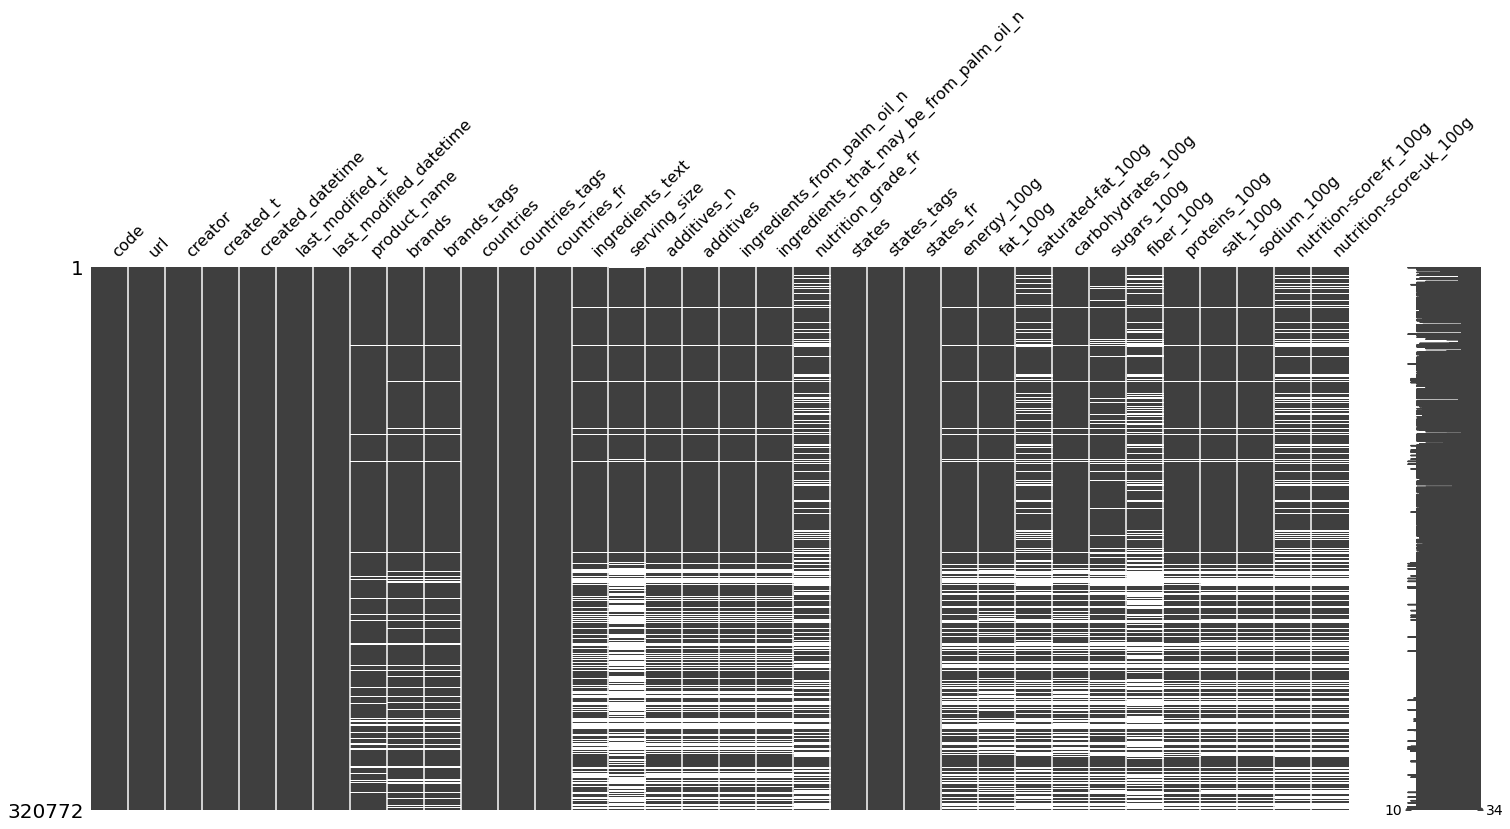

In [12]:
# Nouvelle visualisation du taux de remplissage du dataset
msno.matrix(nan_filtered_data)

Maintenant, nous allons filtrer les colonnes qui transportent la même information que leurs voisinnes (comme vu plus haut) afin de voir quelles informations nous allons pouvoir exploiter dans notre projet d'application de santé publique.

In [13]:
# Création d'une liste avec le nom des colonnes
column_list = nan_filtered_data.columns

for var in range(len(column_list)): # renvoit l'intégralité de la liste (ici le nom de nos colonnes)
    print(column_list[var])

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
brands
brands_tags
countries
countries_tags
countries_fr
ingredients_text
serving_size
additives_n
additives
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
nutrition_grade_fr
states
states_tags
states_fr
energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g
nutrition-score-fr_100g
nutrition-score-uk_100g


On remarque que les variables suivantes peuvent être considérées comme des doublons:

created_t et created_datetime.

last_modified_t et last_modified_datetime.

brands et brands_tags.

countries, countries_tags et countries_fr.

states, states_tags et states_fr.

Nous allons effectuer quelques vérifications afin de nous en assurer avant de potentiellement procéder à la suppression d'une ou plusieurs de chaque groupe (exceptées les variables dates qui sont simplement codées différemment et qui n'auront donc pas à être vérifiées).

In [14]:
nan_filtered_data.loc[:,['brands', 'brands_tags', 'countries', 'countries_tags', 'countries_fr', 'states', 'states_tags', 'states_fr']] 

,brands,brands_tags,countries,countries_tags,countries_fr,states,states_tags,states_fr
0,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
1,NaN,NaN,US,en:united-states,États-Unis,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
2,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
3,Grizzlies,grizzlies,US,en:united-states,États-Unis,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
4,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
...,...,...,...,...,...,...,...,...
320767,Panzani,panzani,en:RO,en:romania,Roumanie,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
320768,Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
320769,乐吧,乐吧,China,en:china,Chine,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."
320770,Knorr,knorr,en:FR,en:france,France,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com..."


On voit sur ce tableau que les 2 colonnes sur la marques apportent en effet la même information, codée différemment, à l'instar des 3 colonnes sur le Pays. 
Compte tenu de notre projet, nous n'allons effectuer qu'un seul filtrage pays et conserver uniquement les produits vendus sur le territoire français, ce qui nous rend indifférent sur la colonne pays à utiliser pour cette opération (bien que la dernière: countries_fr semble la plus claire).
En outre, nous n'utiliserons l'information "marque" que comme une sortie affichée à l'utilisateur, nous privilégierons donc la colonne 'brands' plutôt que 'brands_tags'. 
Enfin, les 3 colonnes states n'apportent pas d'information sur les produits en eux-même mais plutôt des informations sur leur état dans la base de données, nous allons donc les rétirer toutes trois. 

In [15]:
# Réduction dimensionnelle
final_col_data = nan_filtered_data.drop(['brands_tags', 'countries', 'countries_tags', 'states', 'states_tags', 'states_fr'], axis = 1)

In [16]:
final_col_data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,countries_fr,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,États-Unis,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,États-Unis,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,États-Unis,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,États-Unis,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,Roumanie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,États-Unis,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,Chine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous allons maintenant uniquement conserver les produits vendus en France, et ce grâce à la colonne 'countries_fr'

In [17]:
# Trier les produits français
final_set = final_col_data.loc[final_col_data['countries_fr'] == 'France']

# Nous pouvons aussi supprimer le nurti_score du Royaume-Uni
final_set.drop('nutrition-score-uk_100g', axis = 1, inplace = True)

C:\Users\Gregoire\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

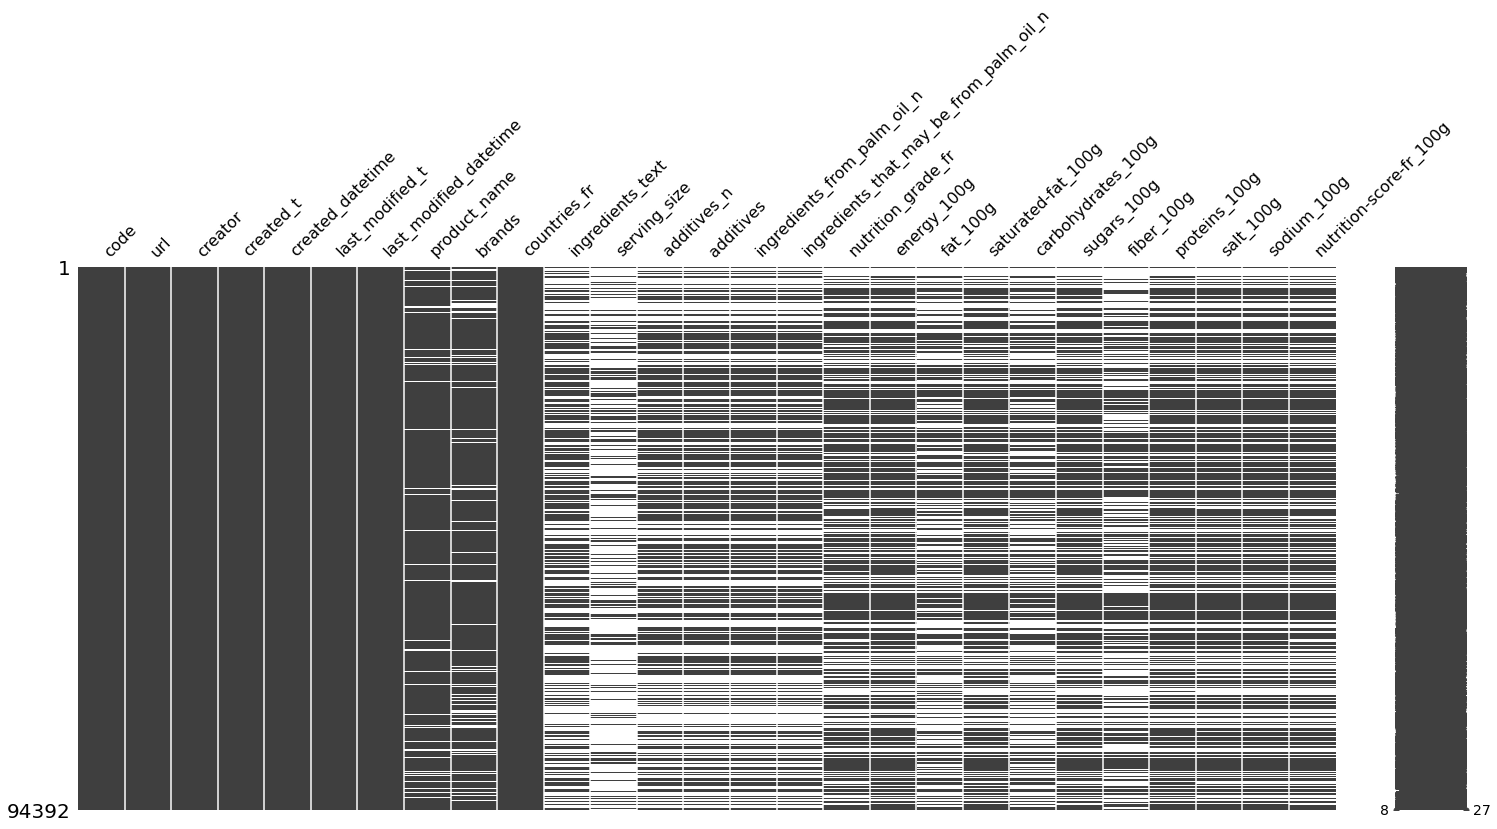

In [18]:
# Nouvelle visualisation des NaN
%matplotlib inline
msno.matrix(final_set)

Il nous reste donc désormais 94392 produits.
On remarque que les informations nutritionnelles sont enregistrées de façon éparses. La prochaine partie de notre travail va s'attaquer au traitement de ces valeurs manquantes.

En effet, notre idée d'application va nécéssiter que les colonnes energy_100g, fat_100g, carbohydrates_100g, proteins_100g, fiber_100g (et éventuellement d'autres colonnes sur les informations nutritionnelles) soient parfaitement reseignées.

Inspectons ces colonnes plus en détail

## Exploration et traitement des valeurs aberrantes et manquantes

Procédons tout d'abord à une description chiffrée rapide des colonnes d'intérêt

In [19]:
# Description des colonnes energy, fat, carbohydrates, proteins, fiber
pd.options.display.float_format = '{:.3f}'.format
final_set[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g']].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,sodium_100g
count,61434.000,44591.000,59390.000,44179.000,59488.000,61184.000,43646.000,59544.000,59541.000
mean,1168.106,13.279,5.386,27.305,13.235,7.794,2.523,1.161,0.457
std,13160.526,16.985,8.539,27.307,19.029,7.931,4.634,4.291,1.689
min,0.000,0.000,0.000,0.000,-0.100,0.000,0.000,0.000,0.000
25%,427.000,1.300,0.300,3.980,1.000,1.800,0.000,0.080,0.031
50%,1028.000,6.800,1.900,14.000,4.000,6.000,1.300,0.570,0.224
75%,1640.000,21.000,7.300,52.700,17.000,11.000,3.200,1.250,0.492
max,3251373.000,380.000,210.000,190.000,105.000,100.000,178.000,211.000,83.000


Concernant les valeurs minimum, elles sont de 0 pour chaque colonne et semblent donc correspondre à la réalité. Il n'y a que sugars qui présente une valeur négative et devra être corrigée.
A l'inverse, concernant le maximum, il semble qu'il y ait un problème pour quasiment toutes les colonnes, exceptée pour 'protein_100g' et 'sodium_100g'. En effet, pour 100g de produit, on ne devrait pas pouvoir observer plus de 100g d'un nutriment ou élément, quel qu'il soit. 
En outre, le maximum de la colonne energy_100g paraît lui aberrant, avec une valeur de 3251373, ce qui se reflète dans la standard déviation qui est aussi très élevée (13160).

Nous allons inspecter ces différentes valeurs maximum.

In [20]:
final_set[final_set['energy_100g'] == final_set['energy_100g'].max()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,countries_fr,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
212928,3257983143096,http://world-fr.openfoodfacts.org/produit/3257...,openfoodfacts-contributors,1465029086,2016-06-04T08:31:26Z,1491931658,2017-04-11T17:27:38Z,Pois cassés,Cora,France,...,3251373.000,1.200,0.200,48.200,2.500,15.400,22.700,0.010,0.004,0.000


In [21]:
# Ces pois cassés sont donc très caloriques. Voyons s'il en existe des moins caloriques.
final_set.loc[final_set['product_name'] == 'Pois cassés']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,countries_fr,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
185169,26061351,http://world-fr.openfoodfacts.org/produit/2606...,v-braquehais,1473955343,2016-09-15T16:02:23Z,1487251963,2017-02-16T13:32:43Z,Pois cassés,Claire et Lucie,France,...,1370.000,1.400,0.200,48.000,2.500,0.000,22.000,0.010,0.004,-1.000
199715,3222471002612,http://world-fr.openfoodfacts.org/produit/3222...,grdscarabe,1350238513,2012-10-14T18:15:13Z,1369487897,2013-05-25T13:18:17Z,Pois cassés,Casino,France,...,1385.000,1.600,0.200,56.000,1.800,6.300,22.000,0.051,0.020,-6.000
204989,3250390004608,http://world-fr.openfoodfacts.org/produit/3250...,openfoodfacts-contributors,1384801963,2013-11-18T19:12:43Z,1441384239,2015-09-04T16:30:39Z,Pois cassés,Saint Eloi,France,...,1412.000,1.800,0.300,50.500,2.300,11.400,23.400,0.025,0.010,-6.000
210785,3256223662113,http://world-fr.openfoodfacts.org/produit/3256...,openfoodfacts-contributors,1460795534,2016-04-16T08:32:14Z,1477808779,2016-10-30T06:26:19Z,Pois cassés,U Bio,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212928,3257983143096,http://world-fr.openfoodfacts.org/produit/3257...,openfoodfacts-contributors,1465029086,2016-06-04T08:31:26Z,1491931658,2017-04-11T17:27:38Z,Pois cassés,Cora,France,...,3251373.000,1.200,0.200,48.200,2.500,15.400,22.700,0.010,0.004,0.000
214690,3263820003003,http://world-fr.openfoodfacts.org/produit/3263...,agamitsudo,1376812205,2013-08-18T07:50:05Z,1462296328,2016-05-03T17:25:28Z,Pois cassés,Le bon semeur,France,...,1431.000,1.400,NaN,56.800,NaN,NaN,22.800,NaN,NaN,NaN
233382,3446400000122,http://world-fr.openfoodfacts.org/produit/3446...,openfoodfacts-contributors,1485502665,2017-01-27T07:37:45Z,1485502702,2017-01-27T07:38:22Z,Pois cassés,La ferme de Louis,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236730,3524220000031,http://world-fr.openfoodfacts.org/produit/3524...,openfoodfacts-contributors,1474789253,2016-09-25T07:40:53Z,1474789253,2016-09-25T07:40:53Z,Pois cassés,Biocoop,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239824,3560070829972,http://world-fr.openfoodfacts.org/produit/3560...,openfoodfacts-contributors,1461348690,2016-04-22T18:11:30Z,1480107772,2016-11-25T21:02:52Z,Pois cassés,Carrefour,France,...,1418.000,1.000,0.100,55.000,3.900,13.000,20.000,0.020,0.008,-6.000
240791,3564700001165,http://world-fr.openfoodfacts.org/produit/3564...,nvallas,1372105862,2013-06-24T20:31:02Z,1486230026,2017-02-04T17:40:26Z,Pois cassés,"Notre Jardin,Marque Repère",France,...,1377.000,2.100,0.300,47.600,5.300,13.200,22.600,0.000,0.000,-5.000


De façon plus générale, la concentration énérgétique maximale pour un produit de 100g semble s'établir à 900kcal, ce qui donne 3700kJ.
Nous pouvons donc supprimer tous les produits qui présentent une 'energie_100g' supérieur à 3700.

In [22]:
# Suppression des lignes dont la valeur de 'energy_100g' est supérieur à 4100 (marge d'erreur)
final_set = final_set[~(final_set['energy_100g'] > 4100)]

In [23]:
# Drop product which have no name
final_set = final_set[~(final_set['product_name'].isnull())]

In [24]:
final_set[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g']].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,sodium_100g
count,61041.000,44280.000,59012.000,43866.000,59102.000,60792.000,43385.000,59161.000,59158.000
mean,1105.627,13.269,5.383,27.285,13.216,7.802,2.520,1.161,0.457
std,772.229,16.902,8.501,27.300,19.008,7.935,4.621,4.299,1.693
min,0.000,0.000,0.000,0.000,-0.100,0.000,0.000,0.000,0.000
25%,426.000,1.300,0.300,3.900,1.000,1.800,0.000,0.080,0.031
50%,1026.000,6.800,1.900,14.000,4.000,6.000,1.300,0.570,0.224
75%,1636.000,21.000,7.300,52.600,17.000,11.000,3.200,1.250,0.492
max,4092.000,105.000,100.000,164.000,105.000,100.000,178.000,211.000,83.000


In [25]:
# Nous allons maintenant traiter rapidement les autres valeurs abérrantes (maximum > 100g)
final_set = final_set[~(final_set['fat_100g'] > 100)]
final_set = final_set[~(final_set['carbohydrates_100g'] > 100)]
final_set = final_set[~(final_set['sugars_100g'] > 100)]
final_set = final_set[~(final_set['sugars_100g'] < 0)]
final_set = final_set[~(final_set['fiber_100g'] > 100)]
final_set = final_set[~(final_set['salt_100g'] > 100)]

In [26]:
final_set[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g']].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,sodium_100g
count,61030.000,44270.000,59002.000,43855.000,59091.000,60782.000,43379.000,59152.000,59149.000
mean,1105.520,13.266,5.383,27.271,13.209,7.803,2.516,1.156,0.455
std,772.167,16.896,8.500,27.278,18.995,7.936,4.544,4.181,1.646
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,426.000,1.300,0.300,3.900,1.000,1.800,0.000,0.080,0.031
50%,1025.500,6.800,1.900,14.000,4.000,6.000,1.300,0.570,0.224
75%,1636.000,21.000,7.300,52.600,17.000,11.000,3.200,1.250,0.492
max,4092.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,39.370


Nos variables semblent maintenant correctement traitées concernant les valeurs aberrantes.

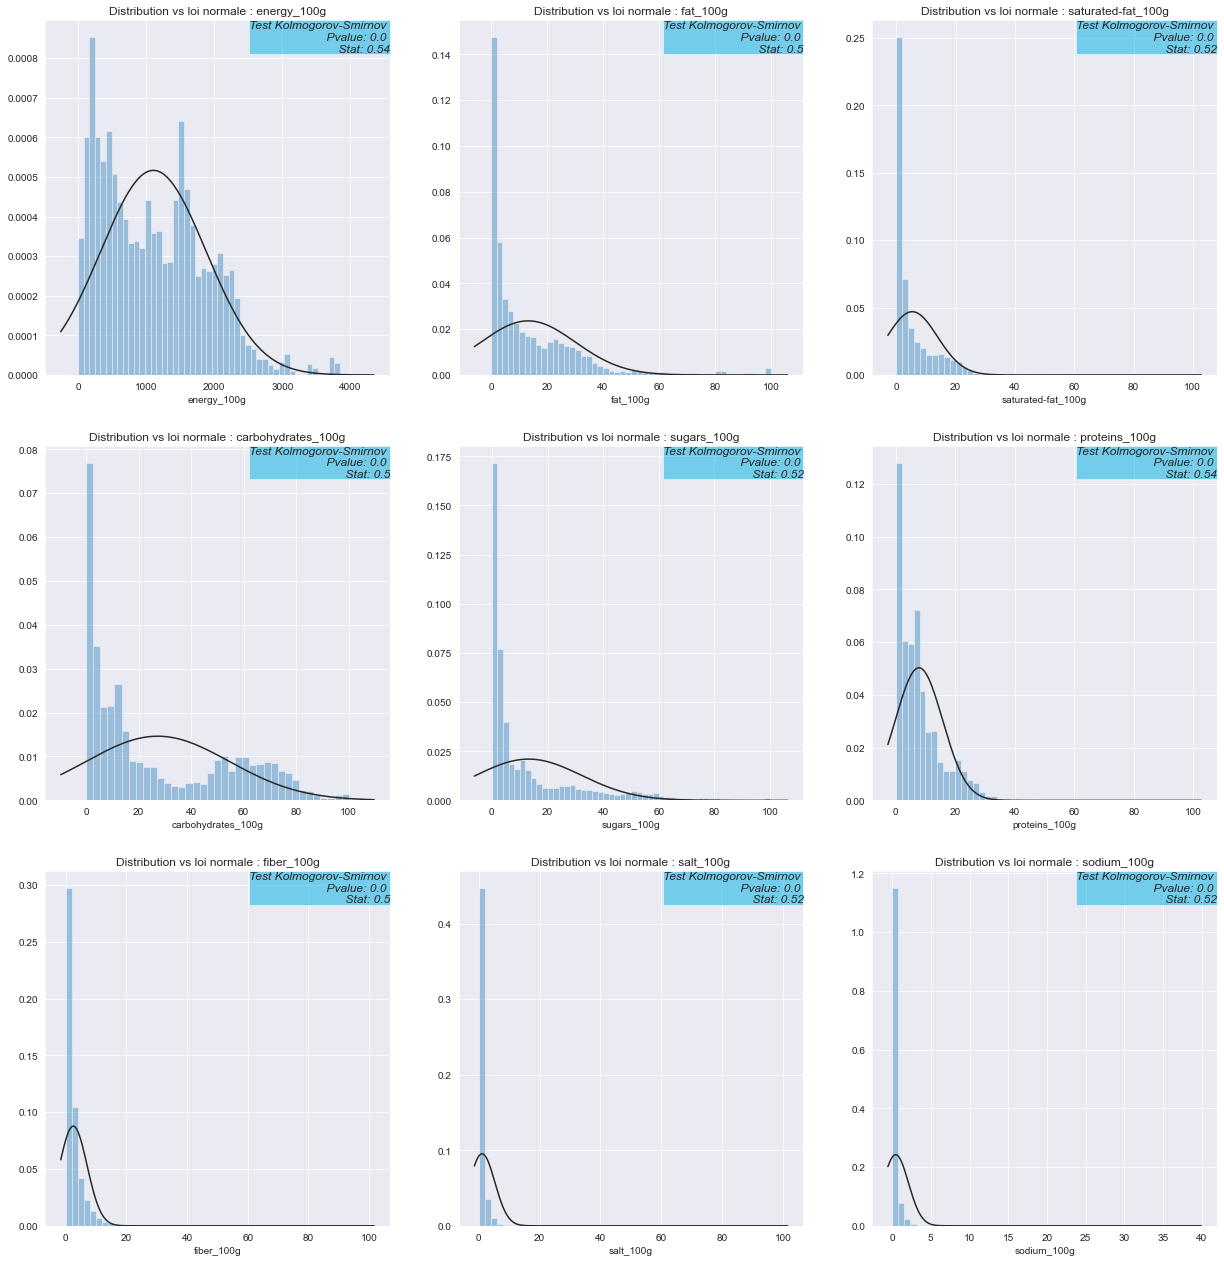

In [27]:
var = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g']
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(var)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = var[i]
    kol_smi_test = stats.kstest(final_set[colonne].notnull(), 'norm')
    ax = sns.distplot(final_set[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kol_smi_test.pvalue, kol_smi_test.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

On voit que nos données ne suivent globalement pas une distribution normale, et le test de Kolmogorov-Smirnov confirme cela (toutes les p-values = 0 et donc sont < 5%, on rejette donc l'hypothèse d'égalité des distribution entre nos chacune de nos variables et la loi Gausienne).
En effet, les produits sont fondamentalement différents les uns des autres en termes nutritionnels, ce qui est un résultat logique).
Pour traiter les valeurs manquantes, on va donc combiner plusieurs approches en évitant donc de compléter par des mesures de tendance centrale (médiane, moyenne). 

In [28]:
final_set[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g']].isnull().sum()

energy_100g           26280
fat_100g              43040
saturated-fat_100g    28308
carbohydrates_100g    43455
sugars_100g           28219
proteins_100g         26528
fiber_100g            43931
salt_100g             28158
sodium_100g           28161
dtype: int64

In [29]:
print(len(final_set) - len(final_set.groupby('product_name')))

15935


Sur nos 94302 produits, 22927 sont présents plusieurs fois dans le dataset. A titre d'exemple, et comme vu plus haut, le nom de produit (product_name) 'Pois cassés' apparaît 12 fois, représentant 12 versions différentes des pois cassés (car globalement de marques différentes). Cependant, leurs informations nutritionnelles sont très proches et nous allons donc pouvoir utiliser les moyennes nutritionnelles de ces produits pour remplir les valeurs manquantes de leurs pairs de marque ou de format différents.

In [30]:
product_mean = final_set.groupby('product_name')[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g']].mean()
product_mean

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,sodium_100g
product_name,,,,,,,,,
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bridelight 3% Les carrés fondants goût Emmental,477.000,3.000,2.000,8.500,8.500,13.000,NaN,2.000,0.787
bière blonde pur malt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 % Pur Jus Pomme,179.000,0.000,0.000,10.000,9.700,0.500,NaN,0.030,0.012
18 marrons glacés,1378.000,0.800,0.100,76.000,56.000,0.800,4.800,0.050,0.020
...,...,...,...,...,...,...,...,...,...
黑師傅-草莓,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
고등어캔,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
쌀떡,983.000,0.500,0.000,NaN,2.000,3.000,54.000,0.178,0.070


In [31]:
# Utilisation des moyennes par produit pour imputer les valeurs manquantes
my_vars = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g']
final_set_new = final_set
for var in my_vars:
    null = final_set[final_set[var].isnull()]
    var_mean = null.merge(product_mean[var], how = 'left', on='product_name')
    var_mean[var] = var_mean[var+'_y']
    var_mean = var_mean[['code', var]]
    final_set_new = final_set_new.merge(var_mean, how= 'left', on= 'code')
    final_set_new[var] = np.where(final_set_new[var+'_x'].isnull(), final_set_new[var+'_y'], final_set_new[var+'_x'])

Toutes nos variables d'intérêt voient leur nombre de NaN diminuer et remplacée de façon précise.

In [32]:
# On ne garde que la nouvelle variable
for var in my_vars:
    final_set_new = final_set_new.drop(columns = [var+'_x', var+'_y'])

In [33]:
# Vérification sur le 'Pois cassés'
final_set[final_set['product_name'] == 'Pois cassés']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,countries_fr,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
185169,26061351,http://world-fr.openfoodfacts.org/produit/2606...,v-braquehais,1473955343,2016-09-15T16:02:23Z,1487251963,2017-02-16T13:32:43Z,Pois cassés,Claire et Lucie,France,...,1370.000,1.400,0.200,48.000,2.500,0.000,22.000,0.010,0.004,-1.000
199715,3222471002612,http://world-fr.openfoodfacts.org/produit/3222...,grdscarabe,1350238513,2012-10-14T18:15:13Z,1369487897,2013-05-25T13:18:17Z,Pois cassés,Casino,France,...,1385.000,1.600,0.200,56.000,1.800,6.300,22.000,0.051,0.020,-6.000
204989,3250390004608,http://world-fr.openfoodfacts.org/produit/3250...,openfoodfacts-contributors,1384801963,2013-11-18T19:12:43Z,1441384239,2015-09-04T16:30:39Z,Pois cassés,Saint Eloi,France,...,1412.000,1.800,0.300,50.500,2.300,11.400,23.400,0.025,0.010,-6.000
210785,3256223662113,http://world-fr.openfoodfacts.org/produit/3256...,openfoodfacts-contributors,1460795534,2016-04-16T08:32:14Z,1477808779,2016-10-30T06:26:19Z,Pois cassés,U Bio,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214690,3263820003003,http://world-fr.openfoodfacts.org/produit/3263...,agamitsudo,1376812205,2013-08-18T07:50:05Z,1462296328,2016-05-03T17:25:28Z,Pois cassés,Le bon semeur,France,...,1431.000,1.400,NaN,56.800,NaN,NaN,22.800,NaN,NaN,NaN
233382,3446400000122,http://world-fr.openfoodfacts.org/produit/3446...,openfoodfacts-contributors,1485502665,2017-01-27T07:37:45Z,1485502702,2017-01-27T07:38:22Z,Pois cassés,La ferme de Louis,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236730,3524220000031,http://world-fr.openfoodfacts.org/produit/3524...,openfoodfacts-contributors,1474789253,2016-09-25T07:40:53Z,1474789253,2016-09-25T07:40:53Z,Pois cassés,Biocoop,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239824,3560070829972,http://world-fr.openfoodfacts.org/produit/3560...,openfoodfacts-contributors,1461348690,2016-04-22T18:11:30Z,1480107772,2016-11-25T21:02:52Z,Pois cassés,Carrefour,France,...,1418.000,1.000,0.100,55.000,3.900,13.000,20.000,0.020,0.008,-6.000
240791,3564700001165,http://world-fr.openfoodfacts.org/produit/3564...,nvallas,1372105862,2013-06-24T20:31:02Z,1486230026,2017-02-04T17:40:26Z,Pois cassés,"Notre Jardin,Marque Repère",France,...,1377.000,2.100,0.300,47.600,5.300,13.200,22.600,0.000,0.000,-5.000
246045,3596710356942,http://world-fr.openfoodfacts.org/produit/3596...,openfoodfacts-contributors,1461413807,2016-04-23T12:16:47Z,1487329139,2017-02-17T10:58:59Z,Pois cassés,Auchan,France,...,1326.000,NaN,0.200,NaN,3.800,15.000,18.600,0.010,0.004,-7.000


In [34]:
final_set_new[final_set_new['product_name'] == 'Pois cassés']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,countries_fr,...,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,sodium_100g
7278,26061351,http://world-fr.openfoodfacts.org/produit/2606...,v-braquehais,1473955343,2016-09-15T16:02:23Z,1487251963,2017-02-16T13:32:43Z,Pois cassés,Claire et Lucie,France,...,-1.000,1370.000,1.400,0.200,48.000,2.500,22.000,0.000,0.010,0.004
18794,3222471002612,http://world-fr.openfoodfacts.org/produit/3222...,grdscarabe,1350238513,2012-10-14T18:15:13Z,1369487897,2013-05-25T13:18:17Z,Pois cassés,Casino,France,...,-6.000,1385.000,1.600,0.200,56.000,1.800,22.000,6.300,0.051,0.020
23623,3250390004608,http://world-fr.openfoodfacts.org/produit/3250...,openfoodfacts-contributors,1384801963,2013-11-18T19:12:43Z,1441384239,2015-09-04T16:30:39Z,Pois cassés,Saint Eloi,France,...,-6.000,1412.000,1.800,0.300,50.500,2.300,23.400,11.400,0.025,0.010
29036,3256223662113,http://world-fr.openfoodfacts.org/produit/3256...,openfoodfacts-contributors,1460795534,2016-04-16T08:32:14Z,1477808779,2016-10-30T06:26:19Z,Pois cassés,U Bio,France,...,NaN,1386.125,1.529,0.214,51.700,3.157,21.675,10.700,0.018,0.007
32653,3263820003003,http://world-fr.openfoodfacts.org/produit/3263...,agamitsudo,1376812205,2013-08-18T07:50:05Z,1462296328,2016-05-03T17:25:28Z,Pois cassés,Le bon semeur,France,...,NaN,1431.000,1.400,0.214,56.800,3.157,22.800,10.700,0.018,0.007
49331,3446400000122,http://world-fr.openfoodfacts.org/produit/3446...,openfoodfacts-contributors,1485502665,2017-01-27T07:37:45Z,1485502702,2017-01-27T07:38:22Z,Pois cassés,La ferme de Louis,France,...,NaN,1386.125,1.529,0.214,51.700,3.157,21.675,10.700,0.018,0.007
52242,3524220000031,http://world-fr.openfoodfacts.org/produit/3524...,openfoodfacts-contributors,1474789253,2016-09-25T07:40:53Z,1474789253,2016-09-25T07:40:53Z,Pois cassés,Biocoop,France,...,NaN,1386.125,1.529,0.214,51.700,3.157,21.675,10.700,0.018,0.007
54937,3560070829972,http://world-fr.openfoodfacts.org/produit/3560...,openfoodfacts-contributors,1461348690,2016-04-22T18:11:30Z,1480107772,2016-11-25T21:02:52Z,Pois cassés,Carrefour,France,...,-6.000,1418.000,1.000,0.100,55.000,3.900,20.000,13.000,0.020,0.008
55829,3564700001165,http://world-fr.openfoodfacts.org/produit/3564...,nvallas,1372105862,2013-06-24T20:31:02Z,1486230026,2017-02-04T17:40:26Z,Pois cassés,"Notre Jardin,Marque Repère",France,...,-5.000,1377.000,2.100,0.300,47.600,5.300,22.600,13.200,0.000,0.000
60766,3596710356942,http://world-fr.openfoodfacts.org/produit/3596...,openfoodfacts-contributors,1461413807,2016-04-23T12:16:47Z,1487329139,2017-02-17T10:58:59Z,Pois cassés,Auchan,France,...,-7.000,1326.000,1.529,0.200,51.700,3.800,18.600,15.000,0.010,0.004


On voit qu'il ne manque maintenant plus aucune donnée nutritionnelle pour les produits nommés 'Pois cassés'

En guise de deuxième et troisième techniques d'imputation, nous allons mettre en oeuvre d'abord un IterativeImputer, puis ensuite un KNNimputer pour les variables restantes. 

La fonction IterativeImputer est basée sur les FCS (Fully Conditional Specifications) et les modèles dit "MICE" (Multivariate Imputation by Chained Equation) qui autorise les données à être distribuées de façon non-normale. Néanmoins, étant un modèle conditionnel, il est nécéssaire que nos variables soient corrélées pour obtenir un résultat convenable. On ne l'utilisera donc pas sur toutes les colonnes.

Instinctivement, on imagine que les groupes suivants sont assez corrélés et peuvent être utilisés pour l'imputation de leur 'covariates':
- Energy - Fat - Saturated fat
- Carbohydrates - Sugars
- Salt - Sodium

<AxesSubplot:>

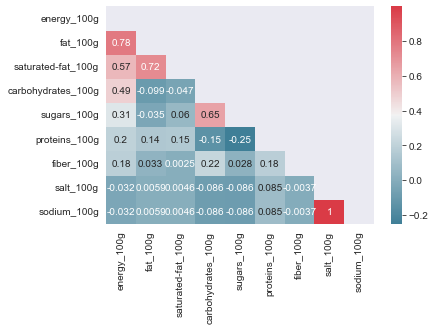

In [35]:
# Correlation map
nutriment_subset = final_set_new[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g']]
corr = nutriment_subset.corr() #correlation calculation
mask = np.triu(np.ones_like(corr, dtype=bool)) #half-correlation table mask
cmap = sns.diverging_palette(225,10, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap, annot=True)

As anticipated, Salt and Sodium are perfectly correlated, fat and energy quite a lot, fat and saturated fat also, as well as carbs and sugars. 

<AxesSubplot:>

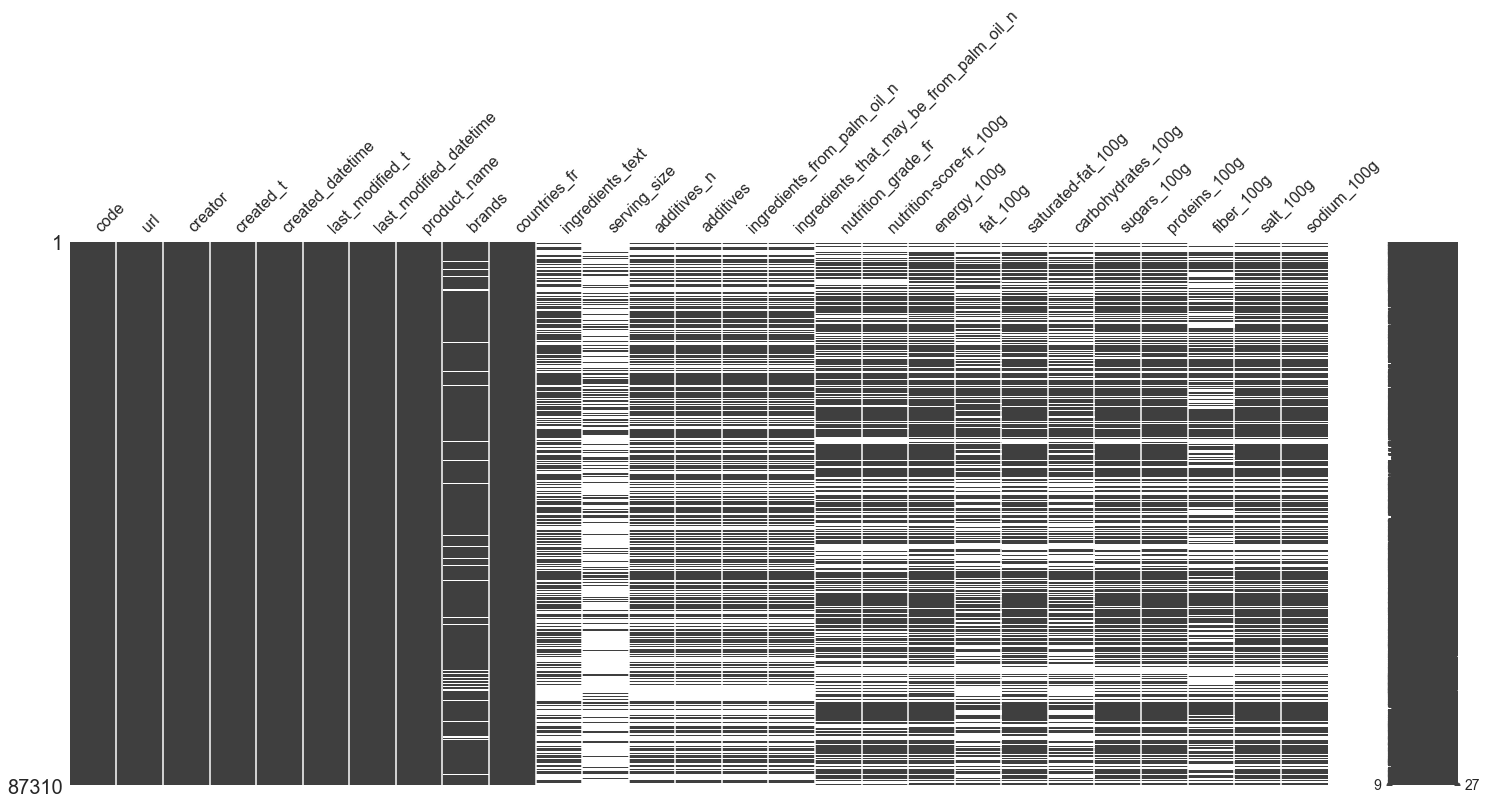

In [36]:
msno.matrix(final_set_new)

In [37]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [38]:
# Energy, fat, and saturated fat imputations
i_imputer = IterativeImputer()
i_imputed_data = i_imputer.fit_transform(X = final_set_new[['energy_100g', 'fat_100g', 'saturated-fat_100g']])

In [39]:
i_imputed_data

array([[1563.        ,    3.2       ,    3.2       ],
       [1102.30192107,   13.48381547,    5.32012279],
       [1102.30192107,   13.48381547,    5.32012279],
       ...,
       [1102.30192107,   13.48381547,    5.32012279],
       [1102.30192107,   13.48381547,    5.32012279],
       [1102.30192107,   13.48381547,    5.32012279]])

In [40]:
final_set_new.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,countries_fr,...,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,fiber_100g,salt_100g,sodium_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,France,...,NaN,1563.000,3.200,3.200,69.800,1.000,12.800,5.000,0.030,0.012
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,Bertrand Lejeune,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000007730009,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1462806432,2016-05-09T15:07:12Z,1482359150,2016-12-21T22:25:50Z,Biscuits sablés fourrage au cacao,St Michel,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By crossing imputed_data with our final_set_new.head(), we can see that Filet de boeuf, Twix x2 or Lentilles Vertes have the exact same energy, fat and saturated fat imputed, which is not an acceptable result.

In [51]:
# We give a try with KNN
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer()
knn_imputer.fit_transform(X = final_set_new[['energy_100g', 'fat_100g', 'saturated-fat_100g']])

array([[1.56300000e+03, 3.20000000e+00, 3.20000000e+00],
       [1.75300000e+03, 1.77891524e+00, 8.00000000e-01],
       [2.40600000e+03, 2.20860753e+01, 2.90000000e+00],
       ...,
       [2.40600000e+03, 5.10666667e+01, 3.73000000e+00],
       [1.09000000e+02, 3.00000000e-01, 7.00000000e-02],
       [2.10000000e+01, 2.00000000e-01, 2.00000000e-01]])

Result look the same. The problem comes from the absence of data in the three columns simultaneously. 
We will filter out the products that don't have at least one observation in each of the three variable groups:

   - Energy - Fat - Saturated fat
   - Carbohydrates - Sugars
   - Salt - Sodium


In [42]:
final_set_new = final_set_new.loc[~(final_set_new['energy_100g'].isnull() & final_set_new['fat_100g'].isnull() & final_set_new['saturated-fat_100g'].isnull())] 
final_set_new = final_set_new.loc[~(final_set_new['carbohydrates_100g'].isnull() & final_set_new['sugars_100g'].isnull())]
final_set_new = final_set_new.loc[~(final_set_new['salt_100g'].isnull() & final_set_new['sodium_100g'].isnull())]

<AxesSubplot:>

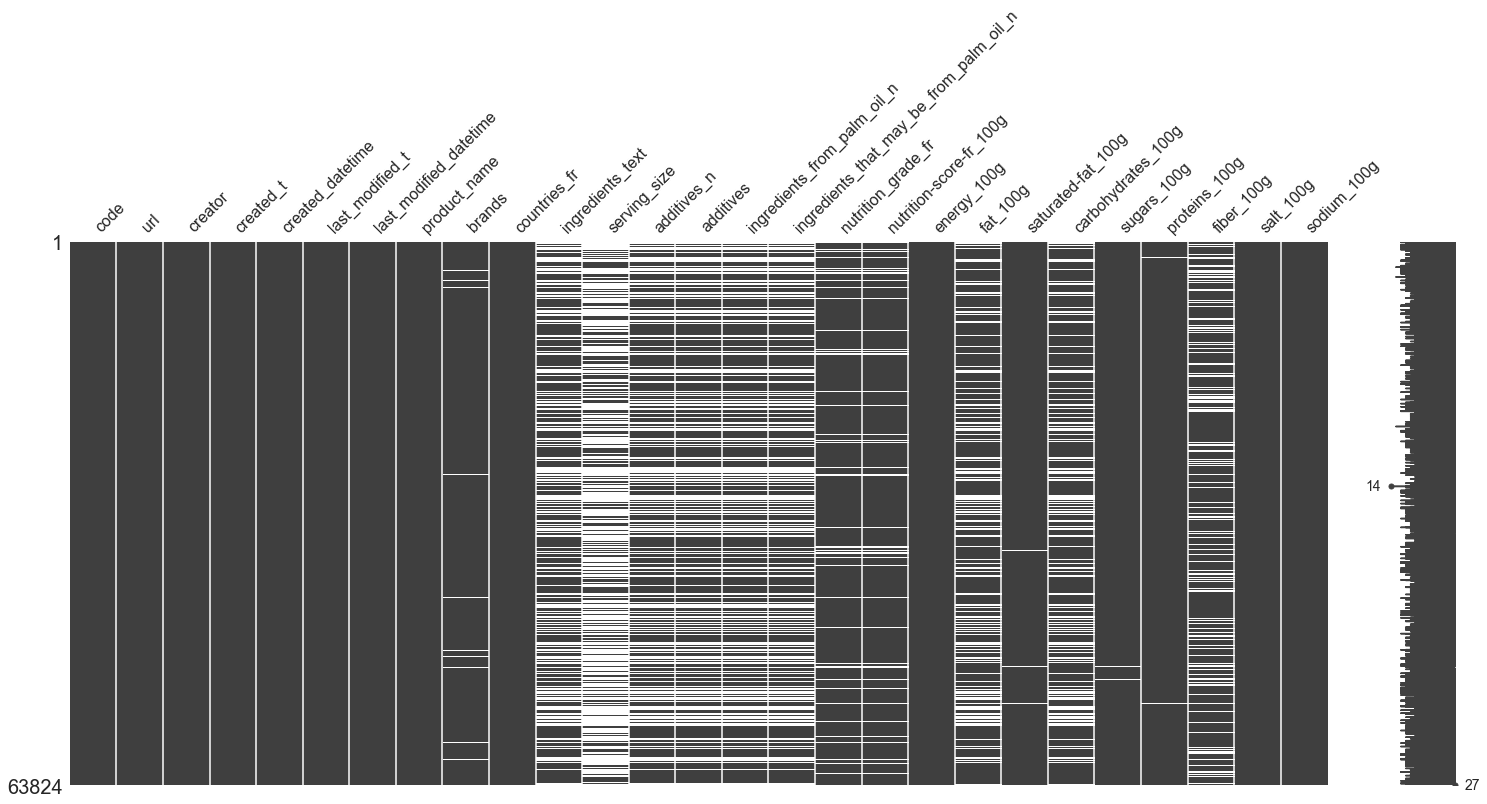

In [43]:
msno.matrix(final_set_new)

We can now retry the imputations.
Another difference with the previous try is that we are now using all other features for prediction, not just the best covariate(s). 

In [44]:
i_imputer_features = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g']
i_imputed_data_full = i_imputer.fit_transform(final_set_new[i_imputer_features])

In [45]:
print(i_imputed_data_full)

[[1.56300000e+03 3.20000000e+00 3.20000000e+00 ... 1.00000000e+00
  3.00000000e-02 1.18110236e-02]
 [1.75300000e+03 1.77891524e+00 8.00000000e-01 ... 8.77000000e+01
  1.00000000e-02 3.93700787e-03]
 [2.40600000e+03 2.20860753e+01 2.90000000e+00 ... 5.03000000e+01
  3.00000000e-03 1.18110236e-03]
 ...
 [2.40600000e+03 5.10666667e+01 3.73000000e+00 ... 3.89000000e+00
  1.00000000e-01 3.93700787e-02]
 [1.09000000e+02 3.00000000e-01 7.00000000e-02 ... 3.25000000e+00
  3.90000000e-02 1.53543307e-02]
 [2.10000000e+01 2.00000000e-01 2.00000000e-01 ... 5.00000000e-01
  2.54000000e-02 1.00000000e-02]]


In [46]:
df_imputed_data = pd.DataFrame(i_imputed_data_full, columns=i_imputer_features)
df_imputed_data

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g
0,1563.000,3.200,3.200,69.800,1.000,0.030,0.012
1,1753.000,1.779,0.800,99.670,87.700,0.010,0.004
2,2406.000,22.086,2.900,83.974,50.300,0.003,0.001
3,177.000,0.000,0.000,10.400,10.400,0.025,0.010
4,1079.000,20.004,11.000,10.386,1.000,0.800,0.315
...,...,...,...,...,...,...,...
63819,623.500,5.680,0.450,15.832,0.700,1.235,0.486
63820,1643.000,2.800,0.600,74.800,2.600,0.680,0.268
63821,2406.000,51.067,3.730,10.300,3.890,0.100,0.039
63822,109.000,0.300,0.070,12.400,3.250,0.039,0.015


In [47]:
for feature in i_imputer_features:
    final_set_new[feature] = df_imputed_data[feature].values

<AxesSubplot:>

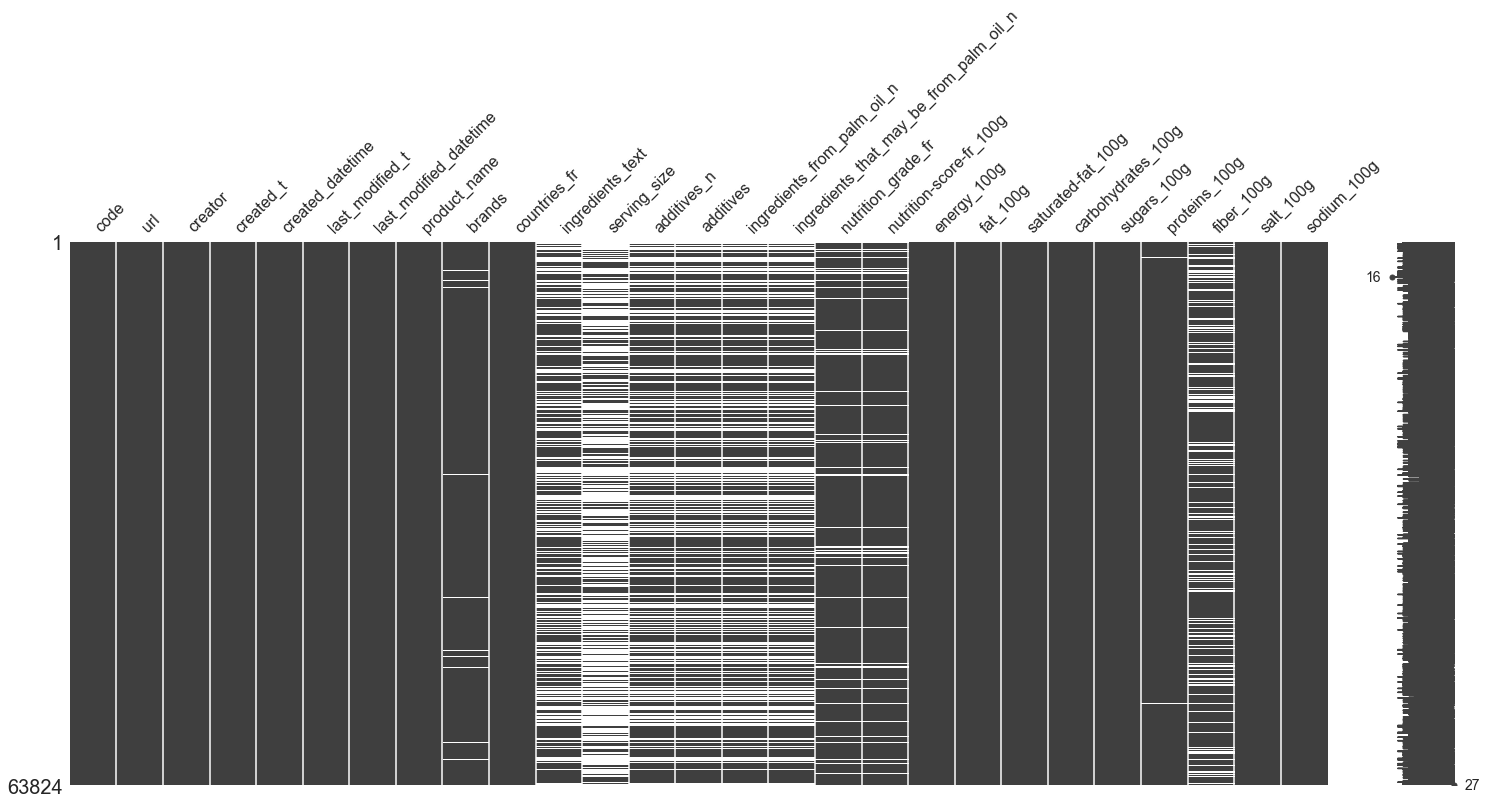

In [48]:
# Check for remaining missing values
msno.matrix(final_set_new)

In [49]:
final_set_new[i_imputer_features].isnull().sum()

energy_100g           0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
salt_100g             0
sodium_100g           0
dtype: int64

We now only have to deal with the very few NaN in the protein column, and the larger amount in fiber.
Because there is little correlation detected with another column for those two, we will try a KNNimputer

In [54]:
#KNNImputer for fiber and protein
knn_features = ['proteins_100g', 'fiber_100g']
knn_imputed_data = knn_imputer.fit_transform(X = final_set_new[knn_features])

In [55]:
df_knn_imputed_data = pd.DataFrame(knn_imputed_data, columns=knn_features)
df_knn_imputed_data

,proteins_100g,fiber_100g
0,12.800,5.000
1,0.600,0.900
2,9.500,3.900
3,0.000,0.000
4,7.500,1.400
...,...,...
63819,0.700,1.350
63820,13.000,5.900
63821,21.220,12.200
63822,1.700,1.950


In [56]:
for feature in knn_features:
    final_set_new[feature] = df_knn_imputed_data[feature].values

<AxesSubplot:>

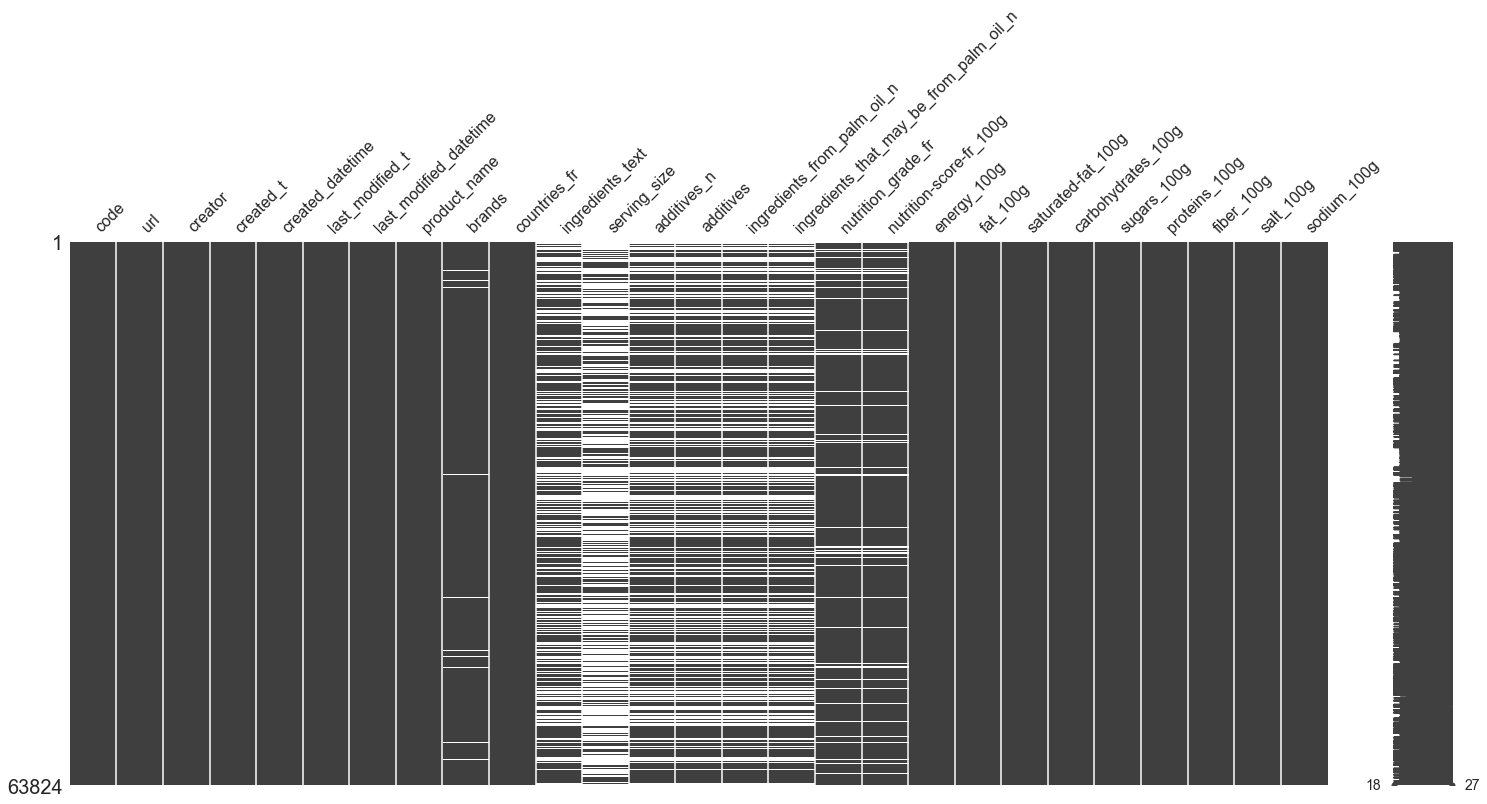

In [57]:
msno.matrix(final_set_new)

In [59]:
final_set_new[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 'sodium_100g']].isnull().sum()

energy_100g           0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
proteins_100g         0
fiber_100g            0
salt_100g             0
sodium_100g           0
dtype: int64

This is it. Our features of interest are now fully filled, and we can go to the next step: the exploratory analysis.